# Supervised models

Let's first simulate a 2D nonlinear functions as follow. The goal of this task is to predict the true function by observing few samples from it.


In [5]:
import numpy as np

def create2Dsurface(x,y):
    z = x*np.exp(-x**2-y**2) 
    return z


### Create Training Data
To do this, we will create our training dataset and visulaize the as follow:




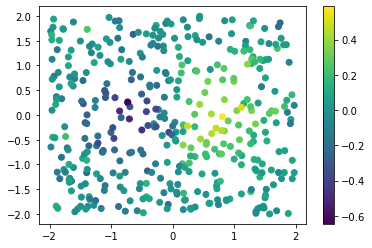

In [6]:
import matplotlib.pyplot as plt

n = 400
x = np.random.rand(n)*4-2 # create data from [-2,2]
y = np.random.rand(n)*4-2 # create data from [-2,2]
Ztrue = create2Dsurface(x,y)
y_train = Ztrue+np.random.randn(n)*0.1
X_train = np.concatenate((x.flatten()[:,np.newaxis],y.flatten()[:,np.newaxis]),axis=1)
#print(X_train)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plt.colorbar()
plt.show()

### Create a visualization function for the Testing Data
We will create our Testing dataset based on the 2D meshgrid and visulaize the image of this 2D surface. You can use `visualize_2D`.

In [7]:
ntest = 100
ti = np.linspace(-2.0, 2.0, ntest)
x1test, x2test = np.meshgrid(ti, ti)
y_test = create2Dsurface(x1test,x2test).flatten()
X_test = np.concatenate((x1test.flatten()[:,np.newaxis],x2test.flatten()[:,np.newaxis]),axis=1)


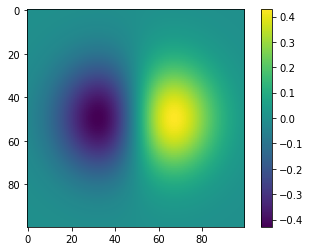

In [8]:
def visualize_2D(y_test):
    plt.imshow(y_test.reshape((ntest,ntest)))
    plt.colorbar()
    plt.show()

visualize_2D(y_test)

# Part 1: Plotting Learning Curves
We will try the following methods on this dataset
- Linear Regression
- Support Vector Regression (Kernel version)
- Random Forest Regressor
- Kernel Ridge Regression

## Let's try the Linear Regression on the dataset
Please implement `LinearRegression` from [sklearn.linear_model](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to fit `y_train` from `X_train`.
Please use the testind data `X_test` and `y_test`. 
 1. Compute the mean-square error for the linear regression for the testing samples.
 2. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings.


MSE
0.017993872316981543
Y_TEST


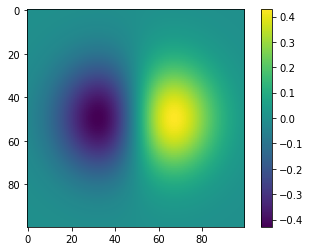

Y_PRED


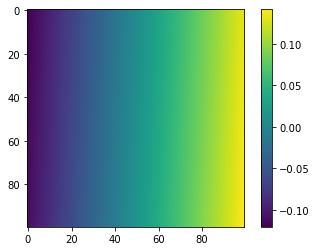

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('MSE')
print(mean_squared_error(y_test, y_pred))
print('Y_TEST')
visualize_2D(y_test)
print('Y_PRED')
visualize_2D(y_pred)
# Put your code here.

## Let's try the Kernel SVM Regression on the dataset
Please implement `SVR` from [sklearn.svm](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm) to fit `y_train` from `X_train`. Please stick with the default `rbf` kernel.

Please use the testind data `X_test` and `y_test`. 
 1. Use tuning parameter selection to select the best kernel bandwidth `gamma` and regularization constance `C`
 2. Compute the mean-square error for the predicted samples.
 3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings.


MSE
0.0009237165719997582
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Y_TEST


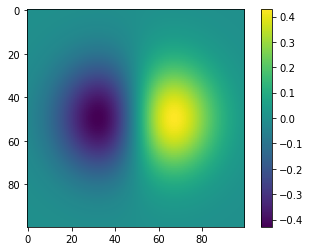

Y_PRED


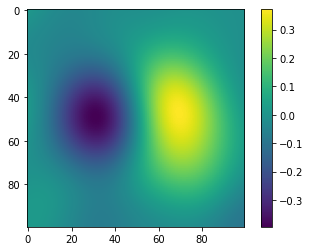

In [11]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
# Set the parameter candidates
parameter_candidates = [
  {'C': [10,1,0.1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001], 'gamma': [10,1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001,0.0000000001,0.00000000001], 'kernel': ['linear']},
  {'C': [10,1,0.1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001], 'gamma': [10,1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001,0.0000000001,0.00000000001], 'kernel': ['rbf']},
]

# Create a classifier with the parameter candidates
model = GridSearchCV(estimator=SVR(), param_grid=parameter_candidates, n_jobs=-1)

#model=SVR(kernel='rbf',C=1)
model.fit(X_train,y_train)
print('MSE')
y_pred=model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(model.best_params_)
print('Y_TEST')
visualize_2D(y_test)
print('Y_PRED')
visualize_2D(y_pred)
# Put your code here.


## Let's try the Random Forest Regression on the dataset
Please implement `RandomForestRegressor` from [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) to fit `y_train` from `X_train`. Please stick with the default `rbf` kernel.

Please use the testind data `X_test` and `y_test`. 


1. Use tuning parameter selection to select the best tuning parameters `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features` (Use “auto”, “sqrt”, “log2” options), 
2. Compute the mean-square error for the predicted samples.
3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings



MSE
0.0064651611062968625
{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}
Y_TEST


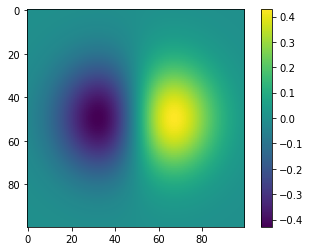

Y_PRED


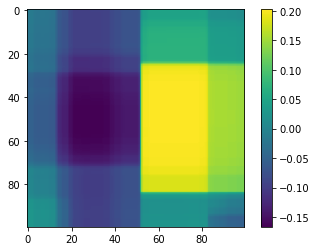

In [12]:
from sklearn.ensemble import RandomForestRegressor
parameter_candidates = [
  {'max_depth':[1,2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,3,4,5,6,7,8],'n_estimators':[100,200,300] ,'max_features':['log2']},
  {'max_depth':[1,2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,3,4,5,6,7,8],'n_estimators':[100,200,300] ,'max_features':['auto']},
]

# Create a classifier with the parameter candidates
model = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameter_candidates, n_jobs=-1)

#model=SVR(kernel='rbf',C=1)
model.fit(X_train,y_train)
print('MSE')
y_pred=model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(model.best_params_)
print('Y_TEST')
visualize_2D(y_test)
print('Y_PRED')
visualize_2D(y_pred)

In [13]:
print(model.best_params_)

{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}


## Let's try the Kernel Ridge Regression on the dataset
Please implement `KernelRidge` from [sklearn.kernel_ridge](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn.kernel_ridge.KernelRidge) to fit `y_train` from `X_train`. Please make sure to change the kernel to `rbf` given the default is `linear`.

Please use the testind data `X_test` and `y_test`. 

1. Use tuning parameter selection to select the best tuning parameters `gamma` for rbf kernel scale and `alpha` for the regularization strength.
2. Compute the mean-square error for the predicted samples.
3. Visualize the final fitting result in a 2D image using `visualize_2D` function. Please briefly summarize your findings




MSE
0.0005419592783579212
{'alpha': 1, 'gamma': 1, 'kernel': 'rbf'}
Y_TEST


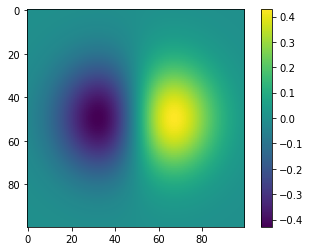

Y_PRED


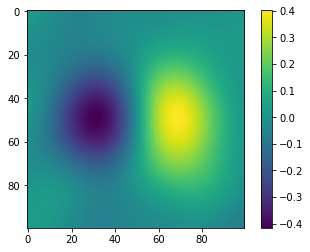

In [14]:
from sklearn.kernel_ridge import KernelRidge
parameter_candidates = [
  {'alpha': [10,1,0.1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001], 'gamma': [10,1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001,0.0000000001,0.00000000001],'kernel':['rbf']},
  {'alpha': [10,1,0.1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001], 'gamma': [10,1, 0.01, .001,0.0001, 0.00001,.000001,0.0000001, 0.00000001,0.0000000001,0.00000000001],'kernel':['linear']},
]

# Create a classifier with the parameter candidates
model = GridSearchCV(estimator=KernelRidge(), param_grid=parameter_candidates, n_jobs=-1)

#model=SVR(kernel='rbf',C=1)
model.fit(X_train,y_train)
print('MSE')
y_pred=model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(model.best_params_)
print('Y_TEST')
visualize_2D(y_test)
print('Y_PRED')
visualize_2D(y_pred)

# Part 2: Plotting Learning Curves

We would like to plot the learning curve of the data. The following code is taken from the following this [example](http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html), where we can use the function of [learning curve](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html#sklearn.model_selection.learning_curve) to plot the learning curve plot. 


- Linear Regression
- Support Vector Regression (Kernel version)
- Random Forest Regressor
- Kernel Ridge Regression

Please justify the result and comment on the learning curve. 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt



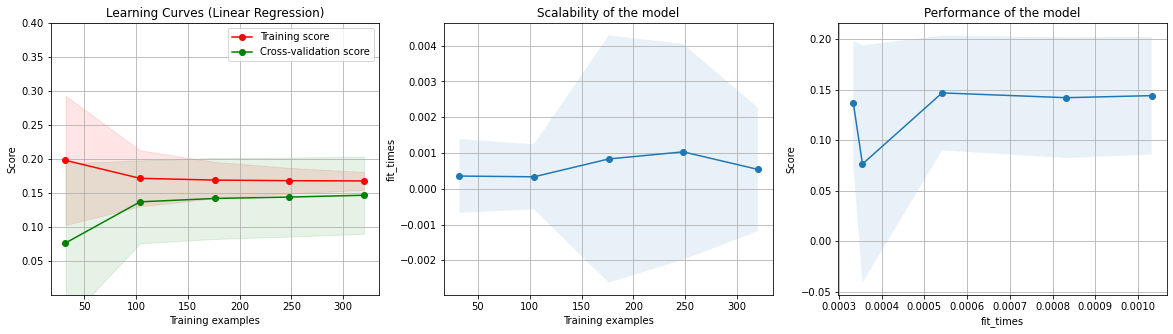

Training score is reducing but cross validation score is increasing with respect to the training examples. This shows underfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance.
As expected, we were unable to sufficiently decrease either the training or the validation error.
Scalability of model increases with more training samples to some extent but later shows a drop.
Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes


In [16]:
title = "Learning Curves (Linear Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.00000001, 0.4), cv=cv, n_jobs=4)
plt.show()
print("Training score is reducing but cross validation score is increasing with respect to the training examples. This shows underfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance.")
print("As expected, we were unable to sufficiently decrease either the training or the validation error.")
print("Scalability of model increases with more training samples to some extent but later shows a drop.")
print("Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes")

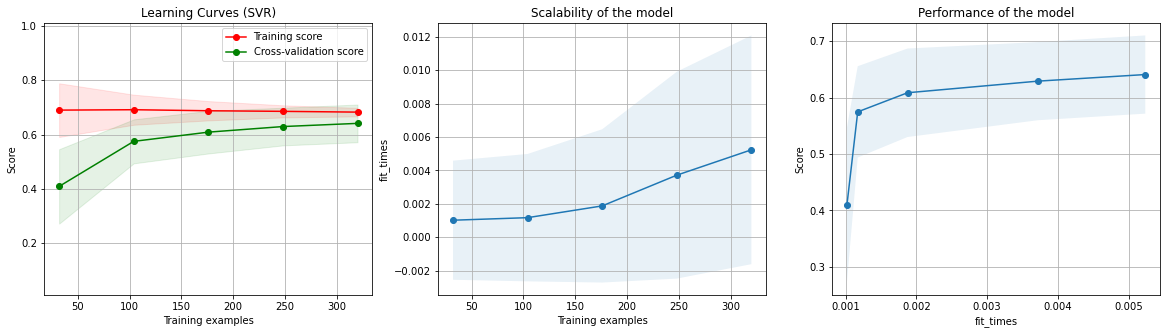

Training score is at maximum regardless of the training examples. This shows overfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance. In this case, we should look to decrease the model complexity.
As expected, we were unable to sufficiently decrease either the training or the validation error.
Scalability of model increases with more training samples.
Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes.


In [17]:
title = "Learning Curves (SVR)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = SVR()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.01, 1.01), cv=cv, n_jobs=4)
plt.show()
print("Training score is at maximum regardless of the training examples. This shows overfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance. In this case, we should look to decrease the model complexity.")
print("As expected, we were unable to sufficiently decrease either the training or the validation error.")
print("Scalability of model increases with more training samples.")
print("Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes.")

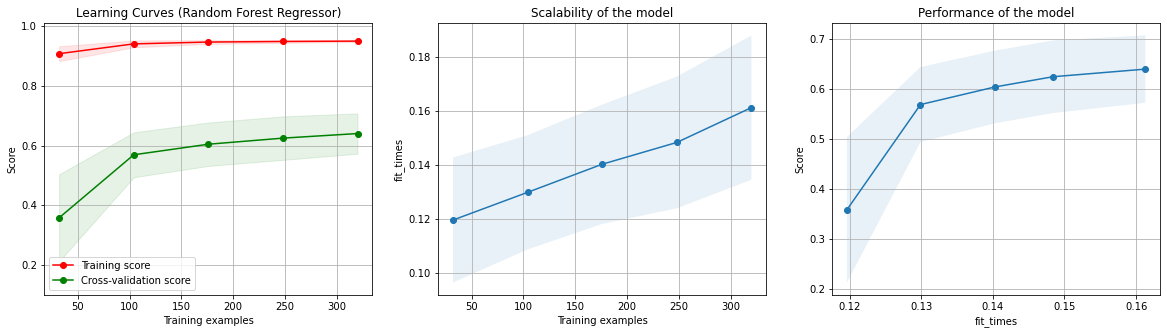

Training score is at maximum regardless of the training examples. This shows overfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance. In this case, we should look to decrease the model complexity or increase the training samples over the time.
As expected, we were unable to sufficiently decrease either the training or the validation error.
Scalability of model increases with more training samples.
Performance of model is significantly improved as we can observe the impact of time required to train the models for each training sizes


In [18]:
title = "Learning Curves (Random Forest Regressor)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.1, 1.01), cv=cv, n_jobs=4)
plt.show()
print("Training score is at maximum regardless of the training examples. This shows overfitting. Cross validation increases over the time. Initially, the gap between cross validation score and training score indicates high variance. In this case, we should look to decrease the model complexity or increase the training samples over the time.")
print("As expected, we were unable to sufficiently decrease either the training or the validation error.")
print("Scalability of model increases with more training samples.")
print("Performance of model is significantly improved as we can observe the impact of time required to train the models for each training sizes")

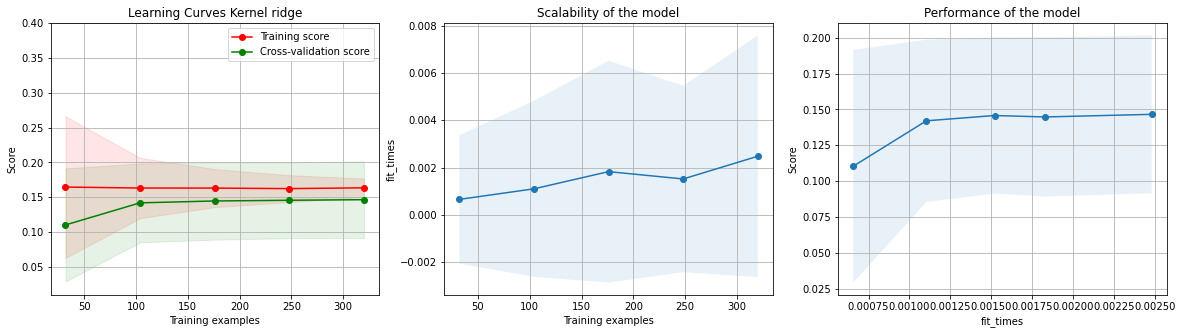

Training score is at maximum regardless of the training examples. This shows overfitting.
As expected, we were unable to sufficiently decrease either the training or the validation error.
Scalability of model increases with more training samples.
Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes


In [19]:
title = "Learning Curves Kernel ridge"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KernelRidge()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.01, 0.4), cv=cv, n_jobs=4)
plt.show()
print("Training score is at maximum regardless of the training examples. This shows overfitting.")
print("As expected, we were unable to sufficiently decrease either the training or the validation error.")
print("Scalability of model increases with more training samples.")
print("Performance of model is not significantly improved as we can observe the impact of time required to train the models for each training sizes")